# 1 微分方程求解示范
vdp1(t,y) 这个函数输入是 时间t，向量y  
这里面y有两个分量y[0]和y[1]，返回的也是个向量.
\begin{align}
\dot{y_0} & = y_1 \\
\dot{y_1} & = (1-y_0^2) y_1 - y_0 
\end{align}

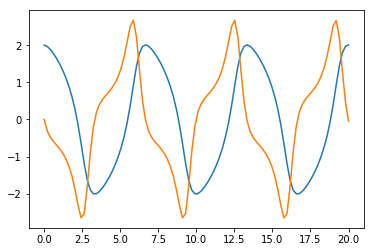

In [5]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
def vdp1(t, y):
    return np.array([y[1], (1 - y[0]**2)*y[1] - y[0]])
t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution
y0 = [2, 0]                   # initial value
y = np.zeros((len(t), len(y0)))   # array for solution
y[0, :] = y0
r = integrate.ode(vdp1).set_integrator("dopri5")  # choice of method
r.set_initial_value(y0, t0)   # initial values
for i in range(1, t.size):
   y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")
plt.plot(t, y)
plt.show()

# 2 两个机场的ODE
模仿上面的微分方程，下面构建里两个机场的流行病模型。

\begin{align}
\dot{p_0} & = -\delta_0 p_0 + b_{10} p_1 (1-p_0) \\
\dot{p_1} & = -\delta_1 p_1 + b_{01} p_0 (1-p_1)
\end{align}

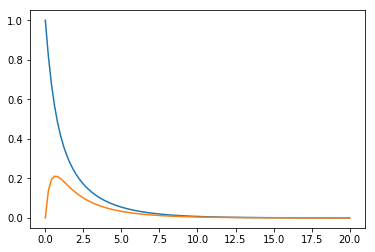

In [53]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

d = [1.0, 2.0]
b = [ [0,1], [1,0] ]

def vdp1(t, p):
    return np.array([-d[0]*p[0]+b[1][0]*p[1]*(1-p[0]) , -d[1]*p[1]+b[0][1]*p[0]*(1-p[1]) ])

t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution

y0 = [1, 0]                   # initial value
y = np.zeros((len(t), len(y0)))   # array for solution

y[0, :] = y0

r = integrate.ode(vdp1).set_integrator("dopri5")  # choice of method
r.set_initial_value(y0, t0)   # initial values
for i in range(1, t.size):
   y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")
plt.plot(t, y)
plt.show()

# 3. 多个机场的ODE

$$\dot{p_i} = -\delta_i p_i + \sum_j b_{ij} p_j (1-p_i)
$$
here the constraint for is $\sum_j b_{ij} = 1$

In [54]:
n = 10
d = np.random.rand(n)
b = np.random.rand(n,n)
bs = np.sum(b,axis=1)
for i in range(n):
    for j in range(n):
        b[i,j] = b[i,j]/bs[i]
np.sum(b,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

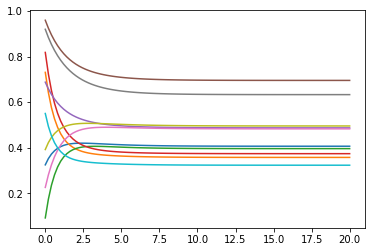

In [52]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

n = 10

d = np.random.rand(n)

b = np.random.rand(n,n)
bs = np.sum(b,axis=1)
for i in range(n):
    for j in range(n):
        b[i,j] = b[i,j]/bs[i]

def vdp1(t, p):
    out = np.zeros(n)
    for i in range(n):
        out[i] = -d[i]*p[i] +  sum( (1-p[i])*p[j]*b[i,j] for j in range(n) )
    return out

t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution

y0 = np.random.rand(n)                # initial value
#y0 = np.ones(n)
y = np.zeros((len(t), len(y0)))   # array for solution

y[0, :] = y0

r = integrate.ode(vdp1).set_integrator("dopri5")  # choice of method
r.set_initial_value(y0, t0)   # initial values
for i in range(1, t.size):
   y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")
plt.plot(t, y)
plt.show()

## 结论：ODE趋向个稳态解。
让时间导数项等于0，我们得到了一个关于$p_i$的多元二次方程。
$$
\delta_i p_i = \sum_j b_{ij} p_j (1-p_i)
$$
## 问题：
如果是稳态解，这显然不能反映真实的机场delay情况。  
那么是否存在参数b和d使得方程有周期解、混沌解？

# 4. 探索“多个机场的ODE”，寻找“非稳态解”的参数和方程。

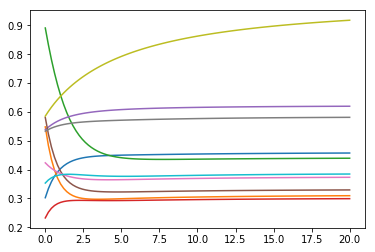

In [64]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

n = 10

d = np.random.rand(n)

b = np.random.rand(n,n)

bs = np.sum(b,axis=1)
for i in range(n):
    for j in range(n):
        b[i,j] = b[i,j]/bs[i]

def vdp1(t, p):
    out = np.zeros(n)
    for i in range(n):
        out[i] = -d[i]*p[i] +  sum( (1-p[i])**2*(p[j])*b[i,j] for j in range(n) )
    return out

t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution

y0 = np.random.rand(n)                # initial value
#y0 = np.ones(n)
y = np.zeros((len(t), len(y0)))   # array for solution

y[0, :] = y0

r = integrate.ode(vdp1).set_integrator("dopri5")  # choice of method
r.set_initial_value(y0, t0)   # initial values
for i in range(1, t.size):
   y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")
plt.plot(t, y)
plt.show()